In [2]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [81]:
co_code = '1801.JP'
start = '2021-05-10'
end = '2022-05-10'
path = 'C://Users//hahih//Documents//MyPython//'
df = data.DataReader(co_code, 'stooq')
df = df[(df.index >= start) & (df.index <= end)] 
df = df.sort_index(ascending=True)
date = df.index
price = df['Close']

In [82]:
#移動平均の設定
span05 = 5
span25 = 25
span50 = 50
df['sma05']= price.rolling(window=span05).mean()
df['sma25']= price.rolling(window=span25).mean()
df['sma50']= price.rolling(window=span50).mean() 

In [16]:
# 5日移動平均線が25日移動平均線を下から上に突き抜けるとゴールデンクロス
# 5日移動平均線が25日移動平均線を上から下に突き抜けるとデッドクロス
def find_cross(short, long):
    # 差分を計算する
    diff = short - long
    
    # diffの各値を直前のデータで引く　2ならゴールデンクロス(GC), -2ならデッドクロス(DC)と判定する
    cross = np.where(np.sign(diff) - np.sign(diff.shift(1)) == 2, "GC", 
                     np.where(np.sign(diff) - np.sign(diff.shift(1)) == -2, "DC", np.nan))
    
    return cross

In [83]:
df['Cross'] = find_cross(df['sma05'], df['sma25'])
df.tail(50)

,Open,High,Low,Close,Volume,sma05,sma25,sma50,Cross
Date,,,,,,,,,
2022-02-22,3699.48,3763.35,3684.74,3758.43,429881,3764.328,3705.1780,3587.7570,nan
2022-02-24,3728.96,3743.69,3660.17,3694.56,687464,3749.588,3708.3220,3592.7682,nan
2022-02-25,3670.00,3704.39,3670.00,3684.74,574396,3731.902,3711.6628,3597.8778,nan
2022-02-28,3699.48,3763.35,3699.48,3748.61,674335,3725.024,3715.9864,3603.7734,nan
2022-03-01,3783.00,3802.65,3778.09,3783.00,690008,3733.868,3719.9168,3610.4550,nan
2022-03-02,3733.87,3753.52,3709.30,3714.22,781704,3725.026,3720.8996,3615.0732,nan
2022-03-03,3748.61,3763.35,3724.04,3753.52,763182,3736.818,3724.2404,3619.8880,nan
2022-03-04,3758.43,3778.09,3674.91,3714.22,712500,3742.714,3725.6160,3623.7202,nan
2022-03-07,3689.65,3743.69,3679.83,3699.48,800735,3732.888,3729.7428,3629.5176,nan


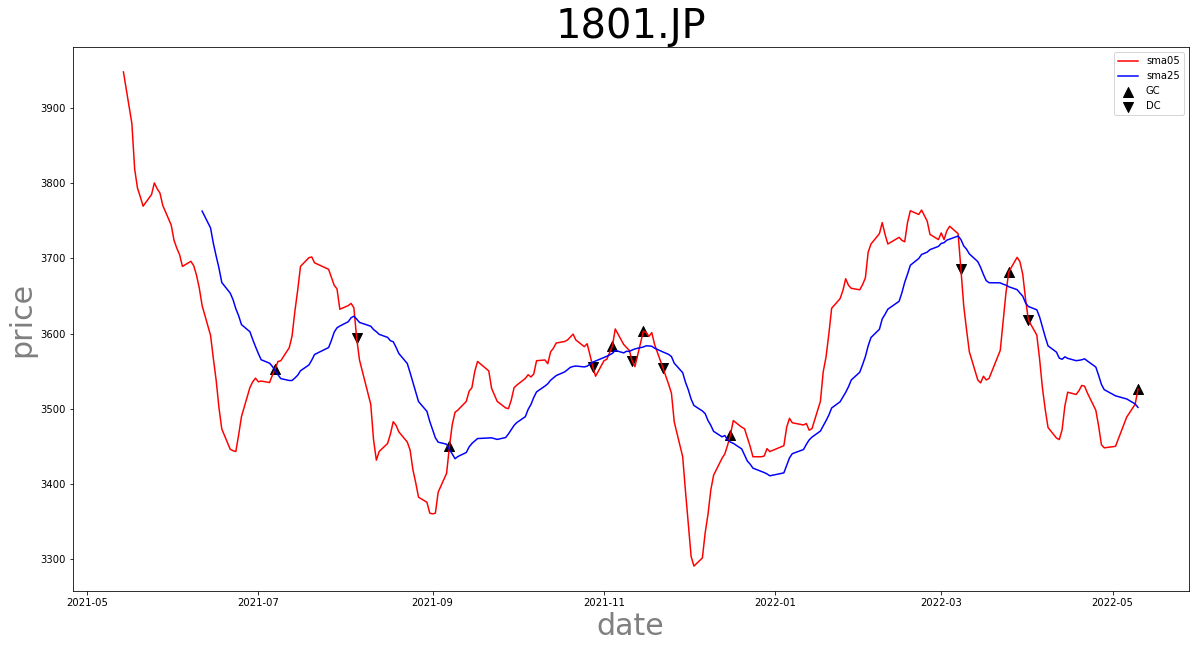

In [86]:
plt.figure(figsize=(20, 10))

# plt.plot(date, price,label='Adj-close', color= '#99b898')
plt.plot(date, df['sma05'],label= 'sma05',color= 'red')
plt.plot(date, df['sma25'],label= 'sma25',color= 'blue')
# plt.plot(date, df['sma50'],label= 'sma50',color= '#feceab')

plt.title(co_code, color= 'black', size= 40, loc= 'center' )
plt.xlabel('date', color= 'grey',size= 30)
plt.ylabel('price', color= 'grey',size= 30)

# ゴールデンクロス
plt.scatter(x=df[df['Cross']=='GC'].index, 
           y=df[df['Cross']=='GC']['sma05'], label='GC',s=100,c='black',marker='^')
# デッドクロス
plt.scatter(x=df[df['Cross']=='DC'].index, 
           y=df[df['Cross']=='DC']['sma05'], label='DC',s=100,c='black',marker='v')
plt.legend()